In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import csv
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load the environment variables by calling the load_dotenv function
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))


str

str

In [4]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))


str

str

In [5]:
# Create your Alpaca API REST object by calling Alpaca's tradeapi.REST function
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2"
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [6]:
# Format the current date as ISO format
today = pd.Timestamp("2021-09-28", tz="America/New_York").isoformat()

In [7]:
# Set the tickers for the stocks you have chosen
# We are selecting the following 15 (note to group that 14 currently work, but added in VOO)
tickers = ["TSM", "QCOM", "VALE", "AMD", "BHP", "RIO", "FCX", "INTC", "MSFT", "DDD", "NVDA", "TSLA", "AMAT", "F", "VOO"]

In [8]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [9]:
# Get current closing prices for above stocks
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 500
).df

# Display sample data
# Auto formats in alphabetical order
df_portfolio

AMAT                                         AMD  \
                             open    high       low   close    volume    open   
time                                                                            
2021-09-28 00:00:00-04:00  137.62  139.58  132.5339  132.91  10774137  106.79   

                                                             ...   VALE  \
                             high     low   close    volume  ...   open   
time                                                         ...          
2021-09-28 00:00:00-04:00  107.65  101.42  101.52  71109820  ...  14.35   

                                                            VOO          \
                            high    low close    volume    open    high   
time                                                                      
2021-09-28 00:00:00-04:00  14.41  13.76  13.8  39804576  405.53  405.87   

                                                    
                              low   close   volume  
time                                                
2021-09-28 00:00:00-04:00  399.33  400.09  7903801  

[1 rows x 75 columns]

In [10]:
# The farthest Alpaca will go back is 4 months for one pull
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2021-05-28", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-09-28", tz="America/New_York").isoformat()

In [11]:
# Get closing prices for chosen stocks from start to end date of choice
df_portfolio_months = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

# Display sample data
df_portfolio_months.head(10)

AMAT                                      AMD  \
                             open    high     low    close   volume   open   
time                                                                         
2021-05-28 00:00:00-04:00  139.10  139.46  137.82  138.130  5352486  78.69   
2021-06-01 00:00:00-04:00  138.98  142.12  137.26  138.200  8172772  81.01   
2021-06-02 00:00:00-04:00  138.10  140.36  136.92  139.010  5701164  81.00   
2021-06-03 00:00:00-04:00  137.13  138.03  135.09  136.380  7450791  81.15   
2021-06-04 00:00:00-04:00  137.80  140.85  137.62  139.860  5760286  80.92   
2021-06-07 00:00:00-04:00  139.22  139.69  138.19  138.970  4654583  81.41   
2021-06-08 00:00:00-04:00  140.34  140.75  135.24  135.849  7075776  81.87   
2021-06-09 00:00:00-04:00  136.85  137.47  134.57  134.680  5859583  81.03   
2021-06-10 00:00:00-04:00  135.89  138.17  135.30  137.170  4925484  80.02   
2021-06-11 00:00:00-04:00  136.82  137.15  135.23  136.810  4774587  81.60   

                                                           ...   VALE  \
                             high    low  close    volume  ...   open   
time                                                       ...          
2021-05-28 00:00:00-04:00  81.090  78.66  80.10  38926159  ...  21.08   
2021-06-01 00:00:00-04:00  82.910  80.66  80.80  41575624  ...  22.69   
2021-06-02 00:00:00-04:00  82.600  80.66  81.99  33784147  ...  22.05   
2021-06-03 00:00:00-04:00  81.890  80.26  80.27  27741701  ...  22.39   
2021-06-04 00:00:00-04:00  82.190  80.81  81.57  24661996  ...  22.68   
2021-06-07 00:00:00-04:00  81.680  80.38  81.33  25756477  ...  22.07   
2021-06-08 00:00:00-04:00  82.645  80.45  80.88  25835849  ...  22.20   
2021-06-09 00:00:00-04:00  81.677  79.80  79.96  26558237  ...  21.97   
2021-06-10 00:00:00-04:00  81.710  79.70  81.55  27148346  ...  22.13   
2021-06-11 00:00:00-04:00  82.330  80.70  81.30  23079467  ...  22.38   

                                                                 VOO  \
                              high     low   close    volume    open   
time                                                                   
2021-05-28 00:00:00-04:00  21.6700  20.950  21.520  37971342  387.03   
2021-06-01 00:00:00-04:00  22.8000  22.060  22.195  39826043  388.50   
2021-06-02 00:00:00-04:00  22.8300  21.975  22.690  42481594  386.43   
2021-06-03 00:00:00-04:00  22.4900  22.010  22.405  25519244  384.17   
2021-06-04 00:00:00-04:00  22.6850  22.255  22.460  18947927  386.81   
2021-06-07 00:00:00-04:00  22.3600  22.070  22.300  23450123  388.52   
2021-06-08 00:00:00-04:00  22.2650  21.790  21.880  25770795  389.00   
2021-06-09 00:00:00-04:00  22.3950  21.851  22.150  30557007  389.08   
2021-06-10 00:00:00-04:00  22.3699  22.000  22.235  33852127  388.86   
2021-06-11 00:00:00-04:00  22.4770  22.140  22.400  22231265  390.00   

                                                              
                               high     low   close   volume  
time                                                          
2021-05-28 00:00:00-04:00  387.2700  385.94  386.14  2989968  
2021-06-01 00:00:00-04:00  388.6200  385.38  385.79  3450288  
2021-06-02 00:00:00-04:00  387.2400  385.47  386.49  3091198  
2021-06-03 00:00:00-04:00  386.1100  382.70  385.09  3161557  
2021-06-04 00:00:00-04:00  388.8000  386.76  388.53  2054784  
2021-06-07 00:00:00-04:00  388.6900  387.25  388.19  2325799  
2021-06-08 00:00:00-04:00  389.0800  386.44  388.22  2240541  
2021-06-09 00:00:00-04:00  389.1300  387.41  387.63  2680519  
2021-06-10 00:00:00-04:00  390.3597  387.58  389.43  2473548  
2021-06-11 00:00:00-04:00  390.2000  388.73  390.09  2090533  

[10 rows x 75 columns]

In [12]:
# Clean the data and drop all columns except for closing
df_portfolio_months_clean = df_portfolio_months.drop(['open', 'low', 'high'], axis=1, level=1)

# Display sample data
df_portfolio_months_clean.head(5)

AMAT             AMD               BHP           \
                            close   volume  close    volume   close   volume   
time                                                                           
2021-05-28 00:00:00-04:00  138.13  5352486  80.10  38926159  74.110   987471   
2021-06-01 00:00:00-04:00  138.20  8172772  80.80  41575624  76.300  1820431   
2021-06-02 00:00:00-04:00  139.01  5701164  81.99  33784147  76.255  1262039   
2021-06-03 00:00:00-04:00  136.38  7450791  80.27  27741701  74.960  1081251   
2021-06-04 00:00:00-04:00  139.86  5760286  81.57  24661996  76.110   934508   

                             DDD                 F             ...    RIO  \
                           close   volume    close     volume  ...  close   
time                                                           ...          
2021-05-28 00:00:00-04:00  29.44  6490662  14.5300  141622031  ...  87.43   
2021-06-01 00:00:00-04:00  28.99  3609828  14.8100   83200280  ...  90.77   
2021-06-02 00:00:00-04:00  32.33  6547593  14.9000   72766581  ...  90.24   
2021-06-03 00:00:00-04:00  30.20  4739859  16.0001  168681043  ...  88.49   
2021-06-04 00:00:00-04:00  30.00  3231828  15.9601  140827381  ...  89.76   

                                        TSLA                TSM           \
                            volume     close    volume    close   volume   
time                                                                       
2021-05-28 00:00:00-04:00  1652945  625.7100  21525163  117.360  4767144   
2021-06-01 00:00:00-04:00  3921661  624.0300  17155669  118.510  6880051   
2021-06-02 00:00:00-04:00  2278392  605.0001  22315710  118.930  4634811   
2021-06-03 00:00:00-04:00  2524998  572.8250  28308048  116.826  4321505   
2021-06-04 00:00:00-04:00  2344842  599.3500  22616463  119.620  4946838   

                             VALE               VOO           
                            close    volume   close   volume  
time                                                          
2021-05-28 00:00:00-04:00  21.520  37971342  386.14  2989968  
2021-06-01 00:00:00-04:00  22.195  39826043  385.79  3450288  
2021-06-02 00:00:00-04:00  22.690  42481594  386.49  3091198  
2021-06-03 00:00:00-04:00  22.405  25519244  385.09  3161557  
2021-06-04 00:00:00-04:00  22.460  18947927  388.53  2054784  

[5 rows x 30 columns]

In [13]:
# The farthest Alpaca will go back is 4 months for one pull, so we repeat process below
# Format start and end dates as ISO format for four month period
# Use the start date above as the end date below
start_2 = pd.Timestamp("2021-01-01", tz="America/New_York").isoformat()
end_2 = pd.Timestamp("2021-05-27", tz="America/New_York").isoformat()

In [14]:
# Get closing prices for chosen stocks from start to end date of choice
df_portfolio_months_2 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_2,
    end = end_2,
    limit = 1000
).df

# Clean the data and drop all columns except for closing
df_portfolio_months_2_clean = df_portfolio_months_2.drop(['open', 'low', 'high'], axis=1, level=1)

# Display sample data
df_portfolio_months_2_clean.head(10)

AMAT                AMD              BHP  \
                            close    volume    close    volume  close   
time                                                                    
2021-01-04 00:00:00-05:00   86.87   6569399  92.3000  50507796  67.34   
2021-01-05 00:00:00-05:00   89.61   5917088  92.7700  32831671  69.50   
2021-01-06 00:00:00-05:00   90.83   8178419  90.3200  49271453  71.71   
2021-01-07 00:00:00-05:00   94.57   7545334  95.1000  40915929  73.18   
2021-01-08 00:00:00-05:00   95.57   7955703  94.5800  38955375  73.45   
2021-01-11 00:00:00-05:00   97.97   6548707  97.2500  47034398  71.27   
2021-01-12 00:00:00-05:00  100.01   6204285  95.3500  65474748  71.95   
2021-01-13 00:00:00-05:00   98.04   4433132  91.7600  57503643  71.07   
2021-01-14 00:00:00-05:00  105.81  10548388  90.7900  51843612  73.88   
2021-01-15 00:00:00-05:00  103.15   7243103  88.1502  47390574  70.61   

                                        DDD                   F             \
                            volume    close     volume    close     volume   
time                                                                         
2021-01-04 00:00:00-05:00  2548575  10.4700    2172873   8.5200   80476198   
2021-01-05 00:00:00-05:00  3115275  10.8800    1973790   8.6450   67535397   
2021-01-06 00:00:00-05:00  4438674  11.2400    2736705   8.8422   68520361   
2021-01-07 00:00:00-05:00  2122419  22.9600  191024411   9.0500   70837077   
2021-01-08 00:00:00-05:00  2360227  23.5200  132865958   9.0000   57267427   
2021-01-11 00:00:00-05:00  2078863  27.6400   59262138   9.3000   91818823   
2021-01-12 00:00:00-05:00  2420193  24.2400   41817668   9.7750  238887777   
2021-01-13 00:00:00-05:00  2658966  23.4900   20505749   9.7800  170006163   
2021-01-14 00:00:00-05:00  2052843  32.0000   35360507  10.1700  109783187   
2021-01-15 00:00:00-05:00  1716936  28.2518   20073767   9.8300   97933642   

                           ...    RIO              TSLA               TSM  \
                           ...  close   volume    close    volume   close   
time                       ...                                              
2021-01-04 00:00:00-05:00  ...  77.42  2421955  729.750  45293360  111.71   
2021-01-05 00:00:00-05:00  ...  79.26  2207083  735.055  28402584  112.74   
2021-01-06 00:00:00-05:00  ...  82.82  2628211  756.460  41989335  115.60   
2021-01-07 00:00:00-05:00  ...  85.98  2821171  816.240  48080256  121.43   
2021-01-08 00:00:00-05:00  ...  86.68  2325546  880.030  71814487  118.64   
2021-01-11 00:00:00-05:00  ...  83.79  2990361  811.180  55755718  122.55   
2021-01-12 00:00:00-05:00  ...  84.02  3299591  849.220  43550554  122.96   
2021-01-13 00:00:00-05:00  ...  81.76  3947822  854.420  31050197  119.27   
2021-01-14 00:00:00-05:00  ...  84.84  1563476  844.210  29982086  126.29   
2021-01-15 00:00:00-05:00  ...  80.47  1909227  826.160  36516827  125.24   

                                       VALE               VOO           
                             volume   close    volume   close   volume  
time                                                                    
2021-01-04 00:00:00-05:00   9813019  17.400  43157459  339.03  5014185  
2021-01-05 00:00:00-05:00  10259226  17.695  37353783  341.28  3144296  
2021-01-06 00:00:00-05:00  10237526  18.150  37410433  343.43  4701118  
2021-01-07 00:00:00-05:00  12843142  18.930  70417214  348.44  3501103  
2021-01-08 00:00:00-05:00  18508139  18.920  41204672  350.42  3705025  
2021-01-11 00:00:00-05:00  11446712  18.610  34821569  348.22  2946639  
2021-01-12 00:00:00-05:00  26061376  18.700  47528155  348.20  2235336  
2021-01-13 00:00:00-05:00  39810864  18.150  41313192  349.04  3009076  
2021-01-14 00:00:00-05:00  34992522  18.935  24812759  347.88  3438115  
2021-01-15 00:00:00-05:00  16395447  17.640  33115891  345.34  3551537  

[10 rows x 30 columns]

In [15]:
# The farthest Alpaca will go back is 4 months for one pull, so we repeat process below
# Format start and end dates as ISO format for four month period
# Use the start date above as the end date below

start_3 = pd.Timestamp("2020-09-28", tz="America/New_York").isoformat()
end_3 = pd.Timestamp("2021-01-01", tz="America/New_York").isoformat()

df_portfolio_months_3 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_3,
    end = end_3,
    limit = 1000
).df

# Clean the data and drop all columns except for closing
df_portfolio_months_3_clean = df_portfolio_months_3.drop(['open', 'low', 'high'], axis=1, level=1)

# Display sample data
df_portfolio_months_3_clean.head(5)

AMAT               AMD              BHP           \
                           close   volume    close    volume  close   volume   
time                                                                           
2020-09-28 00:00:00-04:00  59.31  6260486  79.5200  43111531  52.74  1874323   
2020-09-29 00:00:00-04:00  59.67  4497400  81.7500  59352515  51.60  4589676   
2020-09-30 00:00:00-04:00  59.44  5961801  81.9301  46458134  51.70  3566851   
2020-10-01 00:00:00-04:00  60.64  6322391  84.8900  49561663  51.33  3351237   
2020-10-02 00:00:00-04:00  58.21  5661902  81.8400  48460433  51.44  3788422   

                            DDD               F             ...     RIO  \
                          close   volume  close     volume  ...   close   
time                                                        ...           
2020-09-28 00:00:00-04:00  4.79  1710523  6.695   43985784  ...  60.500   
2020-09-29 00:00:00-04:00  4.92  4523574  6.590   72070568  ...  60.215   
2020-09-30 00:00:00-04:00  4.90  3508832  6.650   92055328  ...  60.410   
2020-10-01 00:00:00-04:00  4.87  2757108  6.745   98139120  ...  59.840   
2020-10-02 00:00:00-04:00  4.87  2997410  6.890  100975619  ...  60.490   

                                        TSLA              TSM            \
                            volume     close    volume  close    volume   
time                                                                      
2020-09-28 00:00:00-04:00  3067588  421.0602  46468845  79.77   5615288   
2020-09-29 00:00:00-04:00  4921329  418.9900  47891547  80.52  11381895   
2020-09-30 00:00:00-04:00  3850541  428.9700  45355318  81.07  11016860   
2020-10-01 00:00:00-04:00  3089610  447.8100  46783928  82.62  11374781   
2020-10-02 00:00:00-04:00  4728194  415.2699  63810817  80.81  10944652   

                             VALE               VOO           
                            close    volume   close   volume  
time                                                          
2020-09-28 00:00:00-04:00  10.480  37147138  308.32  2376657  
2020-09-29 00:00:00-04:00  10.410  53422405  305.31  2195532  
2020-09-30 00:00:00-04:00  10.580  51168819  307.61  4091286  
2020-10-01 00:00:00-04:00  10.415  41450582  309.58  2819472  
2020-10-02 00:00:00-04:00  10.390  46334197  306.69  3037420  

[5 rows x 30 columns]

In [16]:
#Combine all the cleaned data into one table by using concat
merged_portfolio = pd.concat([df_portfolio_months_3_clean, df_portfolio_months_2_clean, df_portfolio_months_clean])

# Display the head and tail of the newly merged portfolio
merged_portfolio.head()

AMAT               AMD              BHP           \
                           close   volume    close    volume  close   volume   
time                                                                           
2020-09-28 00:00:00-04:00  59.31  6260486  79.5200  43111531  52.74  1874323   
2020-09-29 00:00:00-04:00  59.67  4497400  81.7500  59352515  51.60  4589676   
2020-09-30 00:00:00-04:00  59.44  5961801  81.9301  46458134  51.70  3566851   
2020-10-01 00:00:00-04:00  60.64  6322391  84.8900  49561663  51.33  3351237   
2020-10-02 00:00:00-04:00  58.21  5661902  81.8400  48460433  51.44  3788422   

                            DDD               F             ...     RIO  \
                          close   volume  close     volume  ...   close   
time                                                        ...           
2020-09-28 00:00:00-04:00  4.79  1710523  6.695   43985784  ...  60.500   
2020-09-29 00:00:00-04:00  4.92  4523574  6.590   72070568  ...  60.215   
2020-09-30 00:00:00-04:00  4.90  3508832  6.650   92055328  ...  60.410   
2020-10-01 00:00:00-04:00  4.87  2757108  6.745   98139120  ...  59.840   
2020-10-02 00:00:00-04:00  4.87  2997410  6.890  100975619  ...  60.490   

                                        TSLA              TSM            \
                            volume     close    volume  close    volume   
time                                                                      
2020-09-28 00:00:00-04:00  3067588  421.0602  46468845  79.77   5615288   
2020-09-29 00:00:00-04:00  4921329  418.9900  47891547  80.52  11381895   
2020-09-30 00:00:00-04:00  3850541  428.9700  45355318  81.07  11016860   
2020-10-01 00:00:00-04:00  3089610  447.8100  46783928  82.62  11374781   
2020-10-02 00:00:00-04:00  4728194  415.2699  63810817  80.81  10944652   

                             VALE               VOO           
                            close    volume   close   volume  
time                                                          
2020-09-28 00:00:00-04:00  10.480  37147138  308.32  2376657  
2020-09-29 00:00:00-04:00  10.410  53422405  305.31  2195532  
2020-09-30 00:00:00-04:00  10.580  51168819  307.61  4091286  
2020-10-01 00:00:00-04:00  10.415  41450582  309.58  2819472  
2020-10-02 00:00:00-04:00  10.390  46334197  306.69  3037420  

[5 rows x 30 columns]

In [17]:
# For some reason I am only ever able to show head and tails of a table in two separate code blocks
# So here is the display of the tail of the newly merged portfolio
merged_portfolio.tail()

AMAT                 AMD              BHP  \
                            close    volume     close    volume  close   
time                                                                     
2021-09-22 00:00:00-04:00  138.10   5499382  104.3874  32420839  55.01   
2021-09-23 00:00:00-04:00  141.11   5022612  106.1500  31320213  55.06   
2021-09-24 00:00:00-04:00  141.94   3235463  105.8000  25412547  54.53   
2021-09-27 00:00:00-04:00  142.74   4500169  108.1400  50368251  55.07   
2021-09-28 00:00:00-04:00  132.91  10774137  101.5200  71109820  52.55   

                                      DDD                F            ...  \
                            volume  close   volume   close    volume  ...   
time                                                                  ...   
2021-09-22 00:00:00-04:00  5170304  29.00  1343670  13.240  68361903  ...   
2021-09-23 00:00:00-04:00  8138224  29.49  1307111  13.700  65450567  ...   
2021-09-24 00:00:00-04:00  3004601  29.15  1488537  13.780  52066001  ...   
2021-09-27 00:00:00-04:00  3129419  29.80  1323481  14.169  63099249  ...   
2021-09-28 00:00:00-04:00  6039317  28.55  1220898  14.315  96226953  ...   

                               RIO             TSLA               TSM  \
                             close   volume   close    volume   close   
time                                                                    
2021-09-22 00:00:00-04:00  66.6100  5814441  751.75  13586028  115.93   
2021-09-23 00:00:00-04:00  67.0500  3561548  753.68  11244060  116.18   
2021-09-24 00:00:00-04:00  66.7695  3280825  774.54  20458573  115.62   
2021-09-27 00:00:00-04:00  67.5400  3328176  791.40  26193857  116.16   
2021-09-28 00:00:00-04:00  65.8500  4954738  777.56  23562104  111.86   

                                     VALE               VOO           
                            volume  close    volume   close   volume  
time                                                                  
2021-09-22 00:00:00-04:00  4865158  16.42  50059762  403.86  5462282  
2021-09-23 00:00:00-04:00  4942588  14.82  48252357  408.73  3747855  
2021-09-24 00:00:00-04:00  4194719  14.49  33550901  409.46  3204191  
2021-09-27 00:00:00-04:00  4333765  14.55  44261902  408.31  3370305  
2021-09-28 00:00:00-04:00  9085028  13.80  39804576  400.09  7903801  

[5 rows x 30 columns]

In [18]:
# Send to CSV file

merged_portfolio.to_csv('cleaned_stock_data.csv')

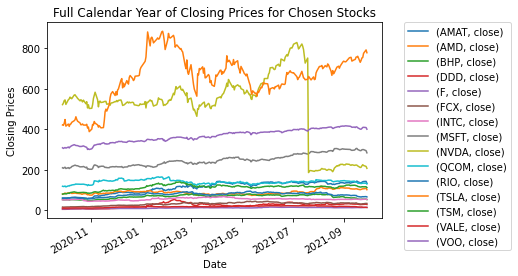

In [19]:
# Graph your stocks closing prices over the course of the last year by using the data you just merged into one portfolio
# We are graphing the data to get a visualization over the stock closing price performance over the last year

# First remove the volume column from the portfolio to just plot the closing prices
merged_portfolio_close_dates = merged_portfolio.drop(['volume'], axis=1, level=1)

merged_portfolio_close_dates.plot()
plt.title('Full Calendar Year of Closing Prices for Chosen Stocks')
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.legend(loc="lower right", bbox_to_anchor=(1.4, -0.19), ncol=1)

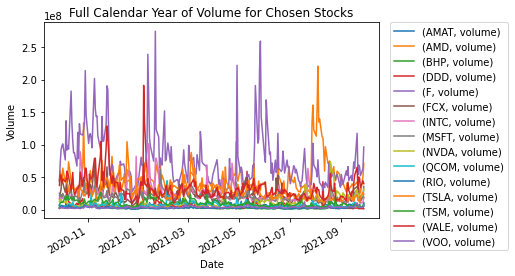

In [20]:
# Graph your stocks daily volume over the course of the last year by using the data you just merged into one portfolio
# We are graphing the data to get a visualization over the changes in volume over the last year

# First remove the close column from the portfolio to just plot the volume
merged_portfolio_volumes = merged_portfolio.drop(['close'], axis=1, level=1)

merged_portfolio_volumes.plot()
plt.title('Full Calendar Year of Volume for Chosen Stocks')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.legend(loc="lower right", bbox_to_anchor=(1.4, -0.19), ncol=1)

In [21]:
# Create a Lagged Volume column that shifts the volume of each stock back by one day

# Since there are multiple columns with the name volume, we must create a loop 
for widget in merged_portfolio.columns.levels[0]:
    merged_portfolio.loc[:,(widget, 'lagged volume')] = merged_portfolio[(widget, 'volume')].shift(1)

# Then we sort the columns to show within each stock
merged_portfolio = merged_portfolio.sort_index(axis=1, level=0)

#Drop NA values
merged_portfolio.dropna(inplace=True)

#Display portfolio 
merged_portfolio.head(3)

AMAT                             AMD  \
                           close lagged volume   volume    close   
time                                                               
2020-09-29 00:00:00-04:00  59.67     6260486.0  4497400  81.7500   
2020-09-30 00:00:00-04:00  59.44     4497400.0  5961801  81.9301   
2020-10-01 00:00:00-04:00  60.64     5961801.0  6322391  84.8900   

                                                     BHP                \
                          lagged volume    volume  close lagged volume   
time                                                                     
2020-09-29 00:00:00-04:00    43111531.0  59352515  51.60     1874323.0   
2020-09-30 00:00:00-04:00    59352515.0  46458134  51.70     4589676.0   
2020-10-01 00:00:00-04:00    46458134.0  49561663  51.33     3566851.0   

                                     DDD  ...      TSLA    TSM                \
                            volume close  ...    volume  close lagged volume   
time                                      ...                                  
2020-09-29 00:00:00-04:00  4589676  4.92  ...  47891547  80.52     5615288.0   
2020-09-30 00:00:00-04:00  3566851  4.90  ...  45355318  81.07    11381895.0   
2020-10-01 00:00:00-04:00  3351237  4.87  ...  46783928  82.62    11016860.0   

                                       VALE                             VOO  \
                             volume   close lagged volume    volume   close   
time                                                                          
2020-09-29 00:00:00-04:00  11381895  10.410    37147138.0  53422405  305.31   
2020-09-30 00:00:00-04:00  11016860  10.580    53422405.0  51168819  307.61   
2020-10-01 00:00:00-04:00  11374781  10.415    51168819.0  41450582  309.58   

                                                  
                          lagged volume   volume  
time                                              
2020-09-29 00:00:00-04:00     2376657.0  2195532  
2020-09-30 00:00:00-04:00     2195532.0  4091286  
2020-10-01 00:00:00-04:00     4091286.0  2819472  

[3 rows x 45 columns]

In [22]:
# Create a Daily Stock Return column that will calculate the daily percent change of the closing stock prices

# Since there are multiple columns with the name close, we must create a loop 

for stock in merged_portfolio.columns.levels[0]:
    merged_portfolio.loc[:,(stock, 'daily return')] = merged_portfolio[(stock, 'close')].pct_change()

# Then we sort the columns to show within each stock
merged_portfolio = merged_portfolio.sort_index(axis=1, level=0)

#Display portfolio 
merged_portfolio.tail(3)

AMAT                                       \
                            close daily return lagged volume    volume   
time                                                                     
2021-09-24 00:00:00-04:00  141.94     0.005882     5022612.0   3235463   
2021-09-27 00:00:00-04:00  142.74     0.005636     3235463.0   4500169   
2021-09-28 00:00:00-04:00  132.91    -0.068866     4500169.0  10774137   

                              AMD                                         BHP  \
                            close daily return lagged volume    volume  close   
time                                                                            
2021-09-24 00:00:00-04:00  105.80    -0.003297    31320213.0  25412547  54.53   
2021-09-27 00:00:00-04:00  108.14     0.022117    25412547.0  50368251  55.07   
2021-09-28 00:00:00-04:00  101.52    -0.061217    50368251.0  71109820  52.55   

                                        ...           TSM            VALE  \
                          daily return  ... lagged volume   volume  close   
time                                    ...                                 
2021-09-24 00:00:00-04:00    -0.009626  ...     4942588.0  4194719  14.49   
2021-09-27 00:00:00-04:00     0.009903  ...     4194719.0  4333765  14.55   
2021-09-28 00:00:00-04:00    -0.045760  ...     4333765.0  9085028  13.80   

                                                                   VOO  \
                          daily return lagged volume    volume   close   
time                                                                     
2021-09-24 00:00:00-04:00    -0.022267    48252357.0  33550901  409.46   
2021-09-27 00:00:00-04:00     0.004141    33550901.0  44261902  408.31   
2021-09-28 00:00:00-04:00    -0.051546    44261902.0  39804576  400.09   

                                                               
                          daily return lagged volume   volume  
time                                                           
2021-09-24 00:00:00-04:00     0.001786     3747855.0  3204191  
2021-09-27 00:00:00-04:00    -0.002809     3204191.0  3370305  
2021-09-28 00:00:00-04:00    -0.020132     3370305.0  7903801  

[3 rows x 60 columns]

In [23]:
# Create a Stock Volatility column that will calculate the standard deviation of the closing stock prices

# Since there are multiple columns with the name close, we must create a loop 

for volatility in merged_portfolio.columns.levels[0]:
    merged_portfolio.loc[:,(volatility, 'stock volatility')] = merged_portfolio[(volatility, 'close')].pct_change().rolling(window=200).std()

# Then we sort the columns to show within each stock
merged_portfolio = merged_portfolio.sort_index(axis=1, level=0)

#Display portfolio 
merged_portfolio.tail(3)

AMAT                                              \
                            close daily return lagged volume stock volatility   
time                                                                            
2021-09-24 00:00:00-04:00  141.94     0.005882     5022612.0         0.027590   
2021-09-27 00:00:00-04:00  142.74     0.005636     3235463.0         0.027538   
2021-09-28 00:00:00-04:00  132.91    -0.068866     4500169.0         0.028000   

                                        AMD                             \
                             volume   close daily return lagged volume   
time                                                                     
2021-09-24 00:00:00-04:00   3235463  105.80    -0.003297    31320213.0   
2021-09-27 00:00:00-04:00   4500169  108.14     0.022117    25412547.0   
2021-09-28 00:00:00-04:00  10774137  101.52    -0.061217    50368251.0   

                                                      ...   VALE               \
                          stock volatility    volume  ...  close daily return   
time                                                  ...                       
2021-09-24 00:00:00-04:00         0.023848  25412547  ...  14.49    -0.022267   
2021-09-27 00:00:00-04:00         0.023771  50368251  ...  14.55     0.004141   
2021-09-28 00:00:00-04:00         0.024138  71109820  ...  13.80    -0.051546   

                                                                       VOO  \
                          lagged volume stock volatility    volume   close   
time                                                                         
2021-09-24 00:00:00-04:00    48252357.0         0.024608  33550901  409.46   
2021-09-27 00:00:00-04:00    33550901.0         0.024608  44261902  408.31   
2021-09-28 00:00:00-04:00    44261902.0         0.024549  39804576  400.09   

                                                                                
                          daily return lagged volume stock volatility   volume  
time                                                                            
2021-09-24 00:00:00-04:00     0.001786     3747855.0         0.007625  3204191  
2021-09-27 00:00:00-04:00    -0.002809     3204191.0         0.007597  3370305  
2021-09-28 00:00:00-04:00    -0.020132     3370305.0         0.007742  7903801  

[3 rows x 75 columns]

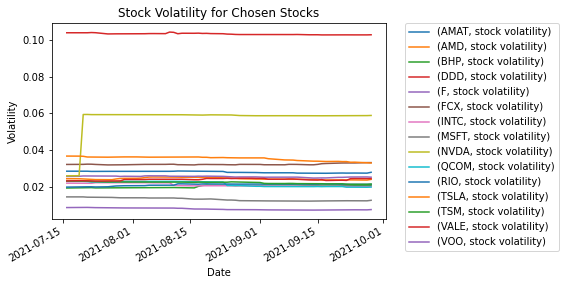

In [24]:
# Graph your stock volatility over the course of the last year by using the data you calculated above
# We are graphing the data to get a visualization over the stock volatility over the last year

# First remove the close, volume, lagged volume, and daily return columns from the portfolio to just plot the volume

merged_portfolio_stock_volatility = merged_portfolio.drop(['close', 'volume', 'lagged volume', 'daily return'], axis=1, level=1)

merged_portfolio_stock_volatility.plot()
plt.title('Stock Volatility for Chosen Stocks')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.legend(loc="lower right", bbox_to_anchor=(1.53, -0.19), ncol=1)

In [25]:
# Creating a correlation table of the daily stock return, lagged volume, and stock volatility

merged_portfolio_corr = merged_portfolio.drop(['close', 'volume'], axis=1, level=1)

merged_portfolio_corr.corr()

AMAT                                 \
                      daily return lagged volume stock volatility   
AMAT daily return         1.000000      0.084831        -0.094378   
     lagged volume        0.084831      1.000000         0.134950   
     stock volatility    -0.094378      0.134950         1.000000   
AMD  daily return         0.576760      0.043441         0.176507   
     lagged volume       -0.032155     -0.085235         0.493539   
     stock volatility    -0.115646      0.185138         0.688359   
BHP  daily return         0.384006      0.031913         0.041692   
     lagged volume        0.087522      0.022183        -0.294964   
     stock volatility     0.026279      0.043424        -0.788876   
DDD  daily return         0.279873     -0.015569         0.032253   
     lagged volume        0.028880      0.062670         0.248685   
     stock volatility    -0.059703      0.114461         0.865947   
F    daily return         0.219988      0.094040        -0.213704   
     lagged volume        0.067678      0.001399        -0.162603   
     stock volatility     0.010921     -0.062621         0.914896   
FCX  daily return         0.382481      0.000900         0.004648   
     lagged volume        0.071480      0.178615        -0.113807   
     stock volatility    -0.182302     -0.136101        -0.453983   
INTC daily return         0.557335      0.056957        -0.111933   
     lagged volume        0.075831      0.084323         0.207963   
     stock volatility     0.062416     -0.215632         0.702055   
MSFT daily return         0.520153      0.127144         0.206749   
     lagged volume        0.079274      0.246418         0.046396   
     stock volatility    -0.042059     -0.000100         0.904282   
NVDA daily return         0.228069      0.031681        -0.113043   
     lagged volume        0.023163     -0.011881         0.053110   
     stock volatility     0.169865     -0.045298        -0.172900   
QCOM daily return         0.637790      0.058471         0.185680   
     lagged volume        0.035732      0.256818         0.057315   
     stock volatility    -0.015374      0.143512         0.965809   
RIO  daily return         0.395922      0.014349        -0.048822   
     lagged volume        0.087127      0.081889        -0.313124   
     stock volatility    -0.069237      0.195115        -0.557632   
TSLA daily return         0.444100     -0.020439        -0.048717   
     lagged volume        0.086077      0.105677         0.162597   
     stock volatility     0.059993      0.068356         0.857366   
TSM  daily return         0.743629      0.023370        -0.033786   
     lagged volume        0.117946      0.205644         0.078763   
     stock volatility     0.046591      0.084352         0.853689   
VALE daily return         0.313897     -0.004622         0.074867   
     lagged volume        0.085488     -0.005603        -0.340700   
     stock volatility    -0.006337     -0.019074        -0.259195   
VOO  daily return         0.645637      0.134467         0.121262   
     lagged volume        0.141288      0.351067        -0.163745   
     stock volatility    -0.022088     -0.049152         0.875745   

                               AMD                                 \
                      daily return lagged volume stock volatility   
AMAT daily return         0.576760     -0.032155        -0.115646   
     lagged volume        0.043441     -0.085235         0.185138   
     stock volatility     0.176507      0.493539         0.688359   
AMD  daily return         1.000000     -0.018711        -0.058627   
     lagged volume       -0.018711      1.000000         0.707880   
     stock volatility    -0.058627      0.707880         1.000000   
BHP  daily return         0.207432     -0.107622        -0.098750   
     lagged volume       -0.027445      0.040333        -0.124187   
     stock volatility    -0.250665     -0.470110        -0.371674   
DDD  daily return         0

In [26]:
# Original idea to calculate correlation 

# merged_portfolio_TSM_corr = merged_portfolio.drop(["QCOM", "VALE", "AMD", "BHP", "RIO", "FCX", "INTC", "MSFT", "DDD", "NVDA", "TSLA", "AMAT", "F", "VOO"], axis=1, level=0)

# merged_portfolio_TSM_corr.corr()

In [27]:
# Below we start running Bollinger Bands to determine return percentage

In [28]:
merged_portfolio_daily_returns = merged_portfolio.drop(['close', 'volume', 'lagged volume', 'stock volatility'], axis=1, level=1)

merged_portfolio_daily_returns.dropna(inplace=True)

merged_portfolio_daily_returns.head(1)

,AMAT,AMD,BHP,DDD,F,FCX,INTC,MSFT,NVDA,QCOM,RIO,TSLA,TSM,VALE,VOO
,daily return,daily return,daily return,daily return,daily return,daily return,daily return,daily return,daily return,daily return,daily return,daily return,daily return,daily return,daily return
time,,,,,,,,,,,,,,,
2020-09-30 00:00:00-04:00,-0.003855,0.002203,0.001938,-0.004065,0.009105,0.020235,0.01133,0.015254,0.023027,0.002812,0.003238,0.023819,0.006831,0.01633,0.007533


In [29]:
# Original strategy to get the covariance of each stock in portfolio

# Below calculates the covariance of TSM to the VOO

merged_portfolio_TSM_cov = merged_portfolio_daily_returns['TSM']['daily return'].cov(merged_portfolio_daily_returns['VOO']['daily return'])

merged_portfolio_TSM_cov



0.00010470058431703292

In [30]:
# Creating a loop to get all the stock covariances to the VOO at once in the order below

stock_ticker_list = ["TSM", "QCOM", "VALE", "AMD", "BHP", "RIO", "FCX", "INTC", "MSFT", "DDD", "NVDA", "TSLA", "AMAT", "F"]

stock_covariance_list = []

for stock in stock_ticker_list:
    stockcov = merged_portfolio_daily_returns[stock]['daily return'].cov(merged_portfolio_daily_returns['VOO']['daily return'])
    stock_covariance_list+=[stockcov]

print(stock_covariance_list)
   

[0.00010470058431703292, 0.00011230420294128597, 8.540442777261903e-05, 9.960682736314755e-05, 9.05974348600115e-05, 8.005966376003688e-05, 0.00012890480020642898, 8.844413493282827e-05, 8.493225703465363e-05, 0.00019609161167008236, 7.616280880207285e-05, 0.0001245767640160952, 0.00014890554171147002, 8.75399796977274e-05]


In [31]:
# Create the variance calculation of all the daily returns vs. VOO

VOO_variance = merged_portfolio_daily_returns['VOO']['daily return'].var()

print(VOO_variance)



7.237857856716541e-05


In [32]:
# trying to create a loop that divided the covariance of each stock by the variance of VOO, both of which have been calculated above already

stock_beta_list = []

for covariance in stock_covariance_list:
    stockbeta = covariance / VOO_variance
    stock_beta_list += [stockbeta]

print(stock_beta_list)
    

[1.4465686725233702, 1.551622112018553, 1.1799682925986998, 1.3761920907401497, 1.2517161383038142, 1.1061237364000402, 1.7809799910177666, 1.2219656241349703, 1.1734446671377876, 2.7092492772307555, 1.0522838429521764, 1.7211827930620556, 2.057315087685642, 1.2094735960653415]


In [33]:
# Remove VOO from the stock_beta_list
# Assign the VOO beta to a variable
voo_beta = stock_beta_list.pop()

# Print the beta of VOO
print(voo_beta)

1.2094735960653415


In [34]:
# Assign the stock_beta_list without voo to stock_beta_list_wo_voo
stock_beta_list_wo_voo = stock_beta_list

# Print stock_beta_list_wo_voo
print(stock_beta_list_wo_voo)


[1.4465686725233702, 1.551622112018553, 1.1799682925986998, 1.3761920907401497, 1.2517161383038142, 1.1061237364000402, 1.7809799910177666, 1.2219656241349703, 1.1734446671377876, 2.7092492772307555, 1.0522838429521764, 1.7211827930620556, 2.057315087685642]


In [35]:
# If we used even weights for all stocks in the portfolio
# The portfolio beta would be the sum of the betas for all the stocks over the number of stocks in the portfolio
# Calculating the portfolio beta
stock_beta_list_wo_voo_sum = sum(stock_beta_list_wo_voo)
stock_beta_list_wo_voo_count = len(stock_beta_list_wo_voo)
stock_beta_list_wo_voo_beta = stock_beta_list_wo_voo_sum / stock_beta_list_wo_voo_count

# Print the portfolio beta given even weights for all stocks
print(stock_beta_list_wo_voo_beta)

1.5098932558312137
